<a href="https://colab.research.google.com/github/a150730/NLP-projects/blob/main/Part_1_Twitter_sentiment_Analysis_Malay_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis: Malay Language**


# **Introduction**

> The project objective mainly to study the nature of noisy Malay social media text( Twitter in particualar), and find out the best available preprocessing technique to handle Malay social media noisy text data. 
Since the main target is Sentiment Analysis, data preprocessing is also a main concern since a good clean data is highly affect the classification results.

> This project generally follows the following framework Model :
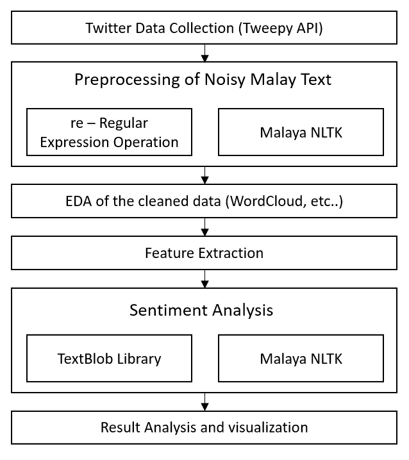



### **00)Install extended module and API using !pip**

In [1]:
!pip install malaya
!pip install malaya-gpu
!pip install tweepy

     |████████████████████████████████| 2.2MB 5.1MB/s 
     |████████████████████████████████| 1.2MB 18.6MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 245kB 26.6MB/s 
     |████████████████████████████████| 286kB 27.3MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=8b1df99a0bc24fd51eb977f582b69b3cd518b3c5494f74666626385d2b55297b
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy
     |████████████████████████████████| 2.2MB 5.4MB/s 
     |████████████████████████████████| 394.3MB 41kB/s 


# **1) Import libraraies packages and modules**

In [2]:
%%time
import pandas as pd 
import tweepy
import malaya
from textblob import TextBlob
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

/usr/local/lib/python3.7/dist-packages/malaya/function/__init__.py:32: UserWarning: Cannot import beam_search_ops not available for Tensorflow 2, `deep_model` for stemmer will not available to use.
  'Cannot import beam_search_ops not available for Tensorflow 2, `deep_model` for stemmer will not available to use.'


CPU times: user 4.04 s, sys: 557 ms, total: 4.59 s
Wall time: 5.68 s


# **2) Accessing twitter API -using tweepy**

In [ ]:
consumer_key ="kjiUiDnn3VgEYpcQirYUWfu8f"
consumer_secret ="kYUdb0ebDtC6D92DDYvEqKShcKVqjgZ3048vyzxNprTua0MYUW"
access_token ="2301609108-l6W2GoHZUHK3ELBWSb4D4fN0J7FIbNe0BLkJQHV"
access_token_secret ="6h64rvQXSvltg9pZBUL3iuVHFKx48q0yvxQtxpWUAMY8C"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

# **3) Raw Data Extraction** 

## 3.1) Search query 
> *Interesting topic to study on is as follows:*
1.   **#KerajaanGagal**
    * Malaysian citizen raise their unsatisfaction towards goverment action.
    * ***KerajaanGagal*** means *Fail Goverment*
    * ID : 1_KG
    * April 15~
    * Political, Crime, HatesComment, Goverment, Citizen 
    * Polarity: Tweets Expected to be more than 90% Negative
    * Emotion : Hate, Sad, Despair, Angry
2.   **#MakeSchoolASaferPlace**
    * High school student (girl) raise an issue regarding how her teacher  discuss topic regarding rape prevention but did it in unpleasant enviroment.
    * ID: 2_MSSP
    * April 25~
    * Education, Sexual Concern,
    * Polarity: Tweets Expected to be more than 70% Negative 
3. **#KRINanggala402**
    * ID: 3_KN
    * April 27
    * Accident regarding Indonesian military submarine that sunk and claimed crew members while on duty 
4. **#sinarharian**
    * ID: 4_SH
    * News tweets
    * ***sinar harian*** is the name of the news channnel
5. **#COVIDMalaysia**
    * ID: 5_CM
    * Pandemic issue
6. **#KitaJagaKita**
    * ID: 6_KJK
    * Pandemic issue
    * ***Kita Jaga Kita*** means *we take care of us* 
7. **#JusticeforGanapathy**
    * Local citizen died in jail while taken captive by local police
    * ID: 7_JG
    * April 28
    * Police Negliance, crime, sensitive
8. *'UPSR'*
    * UPSR stands for *Ujian Penilaian Sekolah Rendah*. A Major Exam as final year in Elementry School. 
    * ID: 8_UPSR
    * Became a **trendy word** since April 28 because the goverment decided to abolished the Exam.
9. @AstroRadioNews
    * ID: 9_ARN
    * News






## **3.2) Extracting tweets**
> The stratergy is
  * Extract tweets --> Convert into DataFrame format --> Save into *.csv* file to use later. ( save format should be as follow;
  topic_date.csv
  example; *KerajaanGagal_April20.csv*
  * We will extract 100 text data for each topic.

In [ ]:
%%time
"""
# put '-filter:retweets' in query will exclude retweets
query1='#KerajaanGagal -filter:retweets'
query2='#MakeSchoolASaferPlace -filter:retweets'
query3='#KRINanggala402 -filter:retweets'
query4='#sinarharian -filter:retweets'
query5='#COVIDMalaysia -filter:retweets'
query6='#KitaJagaKita -filter:retweets'
query7='#JusticeforGanapathy -filter:retweets'
query8='UPSR -filter:retweets'
user= 'AstroRadioNews'   #for post9


post1 = api.search(q=query1, count=100)
post2 = api.search(q=query2, count=100)
post4 = api.search(q=query4, count=100)
post3 = api.search(q=query3, count=100)
post5 = api.search(q=query5, count=100)
post6 = api.search(q=query6, count=100)
post7 = api.search(q=query7, count=100)
post8 = api.search(q=query8, count=100)
post9 = api.user_timeline(screen_name= user,  count=100)
"""

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


"\n# put '-filter:retweets' in query will exclude retweets\nquery1='#KerajaanGagal -filter:retweets'\nquery2='#MakeSchoolASaferPlace -filter:retweets'\nquery3='#KRINanggala402 -filter:retweets'\nquery4='#sinarharian -filter:retweets'\nquery5='#COVIDMalaysia -filter:retweets'\nquery6='#KitaJagaKita -filter:retweets'\nquery7='#JusticeforGanapathy -filter:retweets'\nquery8='UPSR -filter:retweets'\nuser= 'AstroRadioNews'   #for post9\n\n\npost1 = api.search(q=query1, count=100)\npost2 = api.search(q=query2, count=100)\npost4 = api.search(q=query4, count=100)\npost3 = api.search(q=query3, count=100)\npost5 = api.search(q=query5, count=100)\npost6 = api.search(q=query6, count=100)\npost7 = api.search(q=query7, count=100)\npost8 = api.search(q=query8, count=100)\npost9 = api.user_timeline(screen_name= user,  count=100)\n"

## **3.3) View our extracted tweets**

In [ ]:
"""
for tweet in post1[0:1]:
  print ('post1 ='+tweet.text +'\n')
  
for tweet in post2[0:1]:
  print ('post2 ='+tweet.text +'\n')

for tweet in post3[0:1]:
  print ('post3 ='+tweet.text +'\n')

for tweet in post4[0:1]:
  print ('post4 ='+tweet.text +'\n') 

for tweet in post5[0:1]:
  print ('post5 ='+tweet.text +'\n')

for tweet in post6[0:1]:
  print ('post6 ='+tweet.text +'\n')

for tweet in post7[0:1]:
  print ('post7 ='+tweet.text +'\n')

for tweet in post8[0:1]:
  print ('post8 ='+tweet.text +'\n')

for tweet in post9[0:1]:
  print ('post9 ='+tweet.text +'\n')
"""

"\nfor tweet in post1[0:1]:\n  print ('post1 ='+tweet.text +'\n')\n  \nfor tweet in post2[0:1]:\n  print ('post2 ='+tweet.text +'\n')\n\nfor tweet in post3[0:1]:\n  print ('post3 ='+tweet.text +'\n')\n\nfor tweet in post4[0:1]:\n  print ('post4 ='+tweet.text +'\n') \n\nfor tweet in post5[0:1]:\n  print ('post5 ='+tweet.text +'\n')\n\nfor tweet in post6[0:1]:\n  print ('post6 ='+tweet.text +'\n')\n\nfor tweet in post7[0:1]:\n  print ('post7 ='+tweet.text +'\n')\n\nfor tweet in post8[0:1]:\n  print ('post8 ='+tweet.text +'\n')\n\nfor tweet in post9[0:1]:\n  print ('post9 ='+tweet.text +'\n')\n"

## *3.4) Convert tweets into dataframe and Save them to csv file*




In [ ]:
#convert data into dataframe
"""
df1 = pd.DataFrame([tweet.text for tweet in post1], columns =['Raw'])
df2 = pd.DataFrame([tweet.text for tweet in post2], columns =['Raw'])
df3 = pd.DataFrame([tweet.text for tweet in post3], columns =['Raw'])
df4 = pd.DataFrame([tweet.text for tweet in post4], columns =['Raw'])
df5 = pd.DataFrame([tweet.text for tweet in post5], columns =['Raw'])
df6 = pd.DataFrame([tweet.text for tweet in post6], columns =['Raw'])
df7 = pd.DataFrame([tweet.text for tweet in post7], columns =['Raw'])
df8 = pd.DataFrame([tweet.text for tweet in post8], columns =['Raw'])
df9 = pd.DataFrame([tweet.text for tweet in post9], columns =['Raw'])

df1.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/1_KerajaaanGagal_April29.csv', index = False, header=True)
df2.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/2_MakeSchoolASaferPlace_April29.csv', index = False, header=True)
df3.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/3_KRINanggala402_April29.csv', index = False, header=True)
df4.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/4_sinarharian_April29.csv', index = False, header=True)
df5.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/5_COVIDMalaysia_April29.csv', index = False, header=True)
df6.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/6_KitaJagaKita_April29.csv', index = False, header=True)
df7.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/7_JusticeforGanapathy_April29.csv', index = False, header=True)
df8.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/8_UPSR_April29.csv', index = False, header=True)
df9.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/9_AstroRadioNews_April29.csv', index = False, header=True)

df9.info() #just checking the datafranme info and data type
pd.options.display.max_colwidth =150 #extend the column width
pd.options.display.max_rows = 10
df9.head(3) #view our dataframe
"""

"\ndf1 = pd.DataFrame([tweet.text for tweet in post1], columns =['Raw'])\ndf2 = pd.DataFrame([tweet.text for tweet in post2], columns =['Raw'])\ndf3 = pd.DataFrame([tweet.text for tweet in post3], columns =['Raw'])\ndf4 = pd.DataFrame([tweet.text for tweet in post4], columns =['Raw'])\ndf5 = pd.DataFrame([tweet.text for tweet in post5], columns =['Raw'])\ndf6 = pd.DataFrame([tweet.text for tweet in post6], columns =['Raw'])\ndf7 = pd.DataFrame([tweet.text for tweet in post7], columns =['Raw'])\ndf8 = pd.DataFrame([tweet.text for tweet in post8], columns =['Raw'])\ndf9 = pd.DataFrame([tweet.text for tweet in post9], columns =['Raw'])\n\ndf1.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/1_KerajaaanGagal_April29.csv', index = False, header=True)\ndf2.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/2_MakeSchoolASaferPlace_April29.csv', index = False, header=True)\ndf3.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/3_KRINanggala402_April29.csv', index 

## 3.5) Load Our Raw Data

In [3]:
# dfKG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/1_KerajaaanGagal_April29.csv')
dfMSSP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/2_MakeSchoolASaferPlace_April29.csv')
# dfKN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/3_KRINanggala402_April29.csv')
# dfSH = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/4_sinarharian_April29.csv')
# dfCM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/5_COVIDMalaysia_April29.csv')
dfKJK = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/6_KitaJagaKita_April29.csv')
# dfJG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/7_JusticeforGanapathy_April29.csv')
# dfUPSR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/8_UPSR_April29.csv')
# dfARN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/9_AstroRadioNews_April29.csv')


# **4) Data PreProcessing**

### Test Sentence String
> * This few sample test is use just to test our model before proceed with raw dataset, to detect failure in line of code and etc...
* The sample test text was selected from extracted raw dataset. the sample est should include all the main concern for our preprocessing purpose. It should contains noisy text (Uppercase, mispell word, @mention tag, #hashtag, emoji/emoticon, stopwords, Non-Malay word and etc...)




In [4]:
TestSentence1 = '@Marina_Ibrahims Kebabian PN makin terserlah dan muhyiddin kimak \n#KerajaanGagal' #contain ,#tag, @mention, Uppercase extra character
TestSentence2 = '@kuasasiswa you made my day!👏😂\nso .lma dh X rasa gmbira mcm ni 👍 \n#Keraja...' #contain misspell word, emoticon/emoji, English word
TestSentence3 = "@Izzud1n Omg 😭🤚🏼 1234 like, if we doesn't even get good results for upsr. not that we couldn't do well in sekolah menengah. aigoo https://t.co/K4GiA9l1Iw" #contain link, emoticon/emoji, English word, 


## 4.1) PreProcessing 1 - with Malaya

> These preprocessing includes the following steps:
  * Prepprocessing using available tools (lowercase set TRUE)
  * Spell correction :
    * *probability speller*
    * available *Transformer spell correction model*
    * *malaya.symspell* ( upgrade version of symspell)
  * Language translation English (EN) to Malay (MS)

### 4.1.1) *malaya.preprocessing( )*
* normalize: 
'url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'date', 'number'
* annotate :
'allcaps', 'elongated', 'repeated', 'emphasis', 'censored', 'hashtag',
* lowercase



In [5]:
#initialize Malaya prepprocessing model
malayaPreProcess = malaya.preprocessing.preprocessing( lowercase=True)

downloading frozen model to /root/Malaya/preprocessing/english-malay/english-malay-200k.json


6.00MB [00:01, 5.09MB/s]                          
/usr/local/lib/python3.7/dist-packages/malaya/preprocessing.py:84: FutureWarning: Possible nested set at position 42
  k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
/usr/local/lib/python3.7/dist-packages/malaya/preprocessing.py:259: FutureWarning: Possible nested set at position 2289
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


### 4.1.2) *malaya.spell_correction( )*


In [6]:
#spell correction
#prob_corrector = malaya.spell.probability()# pobability corrector
model = malaya.transformer.load(model = 'bert')
transformer_corrector = malaya.spell.transformer(model, sentence_piece = True)

downloading frozen model to /root/Malaya/bert-model/base/bert-bahasa-base.tar.gz


 99%|█████████▉| 392/394 [00:23<00:00, 18.0MB/s]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:484: TqdmWarning: clamping frac to range [0, 1]
  charset=Bar.ASCII if ascii is True else ascii or Bar.UTF)
100%|██████████| 394/394 [00:23<00:00, 16.8MB/s]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
Use `tf.random.categorical` instead.


Instructions for updating:
Use `tf.random.categorical` instead.


INFO:tensorflow:Restoring parameters from /root/Malaya/bert-model/base/bert-base-v3/model.ckpt


INFO:tensorflow:Restoring parameters from /root/Malaya/bert-model/base/bert-base-v3/model.ckpt


downloading frozen model to /root/Malaya/preprocessing/ngram1/bm_1grams.json


113%|██████████| 4.00/3.53 [00:01<00:00, 3.36MB/s]


downloading frozen vocab to /root/Malaya/preprocessing/sentencepiece/sp10m.cased.v4.vocab


150%|██████████| 1.00/0.67 [00:00<00:00, 1.35MB/s]


downloading frozen model to /root/Malaya/preprocessing/sentencepiece/sp10m.cased.v4.model


116%|██████████| 1.00/0.86 [00:00<00:00, 1.11MB/s]


In [8]:
transformer_corrector.correct_text(TestSentence2)

'kuasasiswa you made my day so lama dah X rasa gembira macam ini Keraja'

### 4.1.3) *malaya.translation..( )*
* translate English word to malay using available transformer model 

In [14]:
malaya.translation.en_ms.available_transformer()# how available tarnsformer model (for text translation)
transformer = malaya.translation.en_ms.transformer()
# transformer_small= malaya.translation.en_ms.transformer(model='small')
#transformer_large= malaya.translation.en_ms.transformer(model='large')


downloading frozen model to /root/Malaya/translation-en-ms/base/model.pb


223MB [00:13, 16.3MB/s]                         


downloading frozen vocab to /root/Malaya/translation-en-ms/base/en-ms.subwords


1.00MB [00:00, 1.72MB/s]


In [15]:
from pprint import pprint
print(TestSentence3)
pprint(transformer.beam_decoder([TestSentence3]))

@Izzud1n Omg 😭🤚🏼 1234 like, if we doesn't even get good results for upsr. not that we couldn't do well in sekolah menengah. aigoo https://t.co/K4GiA9l1Iw
[' @ Izzud1n Omg 1234 seperti, jika kita bahkan tidak mendapat hasil yang baik '
 'untuk upsr. bukan bahawa kita tidak dapat melakukannya dengan baik di '
 'sekolah. aigoo https://t.co/K4GiA9l1Iw menengah']


### 4.1.4) *preProcessMalaya()*

In [25]:
def preProcessMalaya(text):
  text = malayaPreProcess.process(text)
  #text = transformer_corrector.correct_text(' '.join(text))
  # text = transformer.beam_decoder([text])
  return ' '.join(text)

In [26]:
%%time
name = preProcessMalaya(TestSentence3)
print(TestSentence3)
print(name)

@Izzud1n Omg 😭🤚🏼 1234 like, if we doesn't even get good results for upsr. not that we couldn't do well in sekolah menengah. aigoo https://t.co/K4GiA9l1Iw
<user> omg 😭 🤚 🏼 <number> seperti , jika kami tidak tidak walaupun dapatkan baik results untuk upsr . tidak itu kami boleh tidak do maklumlah masuk sekolah menengah . aigoo <url>
CPU times: user 1.21 ms, sys: 2 µs, total: 1.22 ms
Wall time: 1.14 ms


In [27]:
%%time
dfMSSP['CD-Malaya'] = dfMSSP['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 65.3 ms, sys: 978 µs, total: 66.3 ms
Wall time: 67.6 ms


In [ ]:
%%time
dfKN['CD-Malaya'] = dfKN['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 2h 37s, sys: 11min 35s, total: 2h 12min 13s
Wall time: 1h 20min 32s


In [ ]:
%%time
dfSH['CD-Malaya'] = dfSH['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 49min 15s, sys: 4min 48s, total: 54min 3s
Wall time: 31min 37s


In [ ]:
%%time
dfCM['CD-Malaya'] = dfCM['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 15min 13s, sys: 1min 47s, total: 17min 1s
Wall time: 9min 55s


In [32]:
%%time
dfKJK['CD-Malaya'] = dfKJK['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 71.1 ms, sys: 1.04 ms, total: 72.2 ms
Wall time: 74 ms


In [ ]:
%%time
dfJG['CD-Malaya'] = dfJG['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 1h 7min 20s, sys: 12min 4s, total: 1h 19min 25s
Wall time: 52min 12s


In [ ]:
%%time
dfUPSR['CD-Malaya'] = dfUPSR['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 1h 7min 16s, sys: 9min 7s, total: 1h 16min 24s
Wall time: 48min 32s


In [ ]:
%%time
dfARN['CD-Malaya'] = dfARN['Raw'].astype(str).apply(preProcessMalaya)

CPU times: user 1h 1min 47s, sys: 4min 7s, total: 1h 5min 54s
Wall time: 38min 48s


In [ ]:
dfMSSP.style

## 4.2) PreProcessing 2 - with Regular Expression-re (pure re)

> The re preprocesisng strategy is as follow:
    * lowercasing
    * remove Non Alpha Numeric character
    * remove hyperlink
    * remove @mention and #hashtag
    * remove number

In [36]:

def stripNonAlphaNum(text):
  text = re.compile(r'\W+', re.UNICODE).split(text)   
  return ' '.join(text)

def preProcessRE(text):
  text = text.lower() #lowercase the character

  text = re.sub(r'https?:\/\/\S+', '', text)#remove hyperlink
  text= re.sub(r'@[A-Z_a-z_0-9]+', '', text)#remove @mentions or user with '_'  
  text= re.sub(r'@[A-Z0-9a-z0-9]+', '', text)#remove @mentions or user that dont have '_'
  text = re.sub(r'#\S+', '',text)#remove #hashtag 
  text = re.sub('[0-9\n]', '', text)#remove number
  text = stripNonAlphaNum(text)
  return text

In [ ]:
print(TestSentence1)
print(preProcessRE(TestSentence1))

@Marina_Ibrahims Kebabian PN makin terserlah dan muhyiddin kimak 
#KerajaanGagal
 kebabian pn makin terserlah dan muhyiddin kimak 


In [30]:
%%time
dfMSSP['CD-RE'] = dfMSSP['Raw'].astype(str).apply(preProcessRE)

CPU times: user 4.74 ms, sys: 0 ns, total: 4.74 ms
Wall time: 4.64 ms


In [ ]:
%%time
dfKN['CD-RE'] = dfKN['Raw'].astype(str).apply(preProcessRE)

CPU times: user 2.88 ms, sys: 0 ns, total: 2.88 ms
Wall time: 2.89 ms


In [ ]:
%%time
dfSH['CD-RE'] = dfSH['Raw'].astype(str).apply(preProcessRE)

CPU times: user 3.73 ms, sys: 0 ns, total: 3.73 ms
Wall time: 3.82 ms


In [ ]:
%%time
dfCM['CD-RE'] = dfCM ['Raw'].astype(str).apply(preProcessRE)

CPU times: user 2.16 ms, sys: 0 ns, total: 2.16 ms
Wall time: 2.12 ms


In [37]:
%%time
dfKJK['CD-RE'] = dfKJK['Raw'].astype(str).apply(preProcessRE)

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 2.53 ms


In [ ]:
%%time
dfJG['CD-RE'] = dfJG['Raw'].astype(str).apply(preProcessRE)

CPU times: user 3.02 ms, sys: 69 µs, total: 3.09 ms
Wall time: 3.1 ms


In [ ]:
%%time
dfUPSR['CD-RE'] = dfUPSR['Raw'].astype(str).apply(preProcessRE)

CPU times: user 6.3 ms, sys: 67 µs, total: 6.37 ms
Wall time: 8.66 ms


In [ ]:
%%time
dfARN['CD-RE'] = dfARN['Raw'].astype(str).apply(preProcessRE)

CPU times: user 4.39 ms, sys: 932 µs, total: 5.32 ms
Wall time: 9.56 ms


In [39]:
dfKJK.info() #view or dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Raw        100 non-null    object
 1   CD-Malaya  100 non-null    object
 2   CD-RE      100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


## 4.4) Export our Cleaned Data 

In [31]:
%%time
dfMSSP.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/2_MSSP_4-29.csv', index = False, header=True)

CPU times: user 6.42 ms, sys: 5 µs, total: 6.43 ms
Wall time: 18.4 ms


In [ ]:
%%time
dfUPSR.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/8_UPSR_5-5.csv', index = False, header=True)
#dfARN.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/9_ARN_5-5.csv', index = False, header=True)

CPU times: user 6.58 ms, sys: 104 µs, total: 6.68 ms
Wall time: 42.4 ms


In [ ]:
%%time
dfARN.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/9_ARN_5-5.csv', index = False, header=True)

CPU times: user 7.09 ms, sys: 0 ns, total: 7.09 ms
Wall time: 29.1 ms


In [40]:
%%time
dfKJK.to_csv ('/content/drive/MyDrive/Colab Notebooks/tweets_data/6_KJK_4-29.csv', index = False, header=True)

CPU times: user 4.17 ms, sys: 992 µs, total: 5.16 ms
Wall time: 10.1 ms


## 4.3) PreProcessing 3 - Mustakim PreProcessing


> Mustakim preprocesing is my propose preprocessing step which the overall step is combination of Malaya NLTK and RE module as follows:
* Lowercasing the character --using python string manipulation
* Removing the NonAlphanumeric and special character -re
* Removing #Hashtag, @Mention or/@user
* 2 option for emoji and emoticon either:
  * 1) Remove
  * 2) Translate them into text (Preferable to maintain the information)
* Identify English word and Translate them to Malay word -- using Malaya transformer translation
* Spelling Correction using Malaya proabbility seplling correction tools 


#### *terjemah_EN_BM( )* 

>  Function to Translate English word to Malay word


In [ ]:
def makna(word):
  lang = translator.detect(word)
  if (lang.lang =='en'):
    word= translator.translate(text, dest='ms')
    return word.text
  else:
    return text

def terjemah_EN_BM(text):
  perkataan = text.split() # string kepada list
  hasil = list(map(makna, perkataan))
  return ' '.join(hasil)
 

In [ ]:
print(terjemah_EN_BM(text15))
print(terjemah_EN_BM(text16))
print(terjemah_EN_BM(text17))

@Marina_Ibrahims Kebabian Pn. makin. terserlah dan I. mahu ke buat bodoh je
@kuasasiswa anda dibuat my hari! 👏😂. So. jauh the Best. troll. Pernah! So. banyak usaha anda letak in👍. #Keraja...
Best. jalan percutian di sini lapangan terbang


#### *remove_emoji( )*

In [ ]:
#removing emoji/emoticon
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#### *convert_emojis_to_word( )*

In [ ]:
#COnvert/translate emoji to text
with open('/content/drive/MyDrive/Colab Notebooks/Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emoj in Emoji_Dict:
        text = re.sub(r'('+emoj+')', "_".join(Emoji_Dict[emoj].replace(",","").replace(":","").split()), text)
    return text

#### *musPreProcess( )*

In [ ]:
#define class for re preperocessing

def musPreProcess(text):
  
  #text = text.lower()# lowercasing the text

  #text = remove_emoji(text) #<---- remove emoji and emoticon  
  text = convert_emojis_to_word(text) #covert/translate emoji or emoticon to word
  text = re.sub(r'https?:\/\/\S+', ' ', text)#remove hyperlink

  text =' '.join(text.split('_')) # split word that merge by underscore '_'

  
  #text = trans_En_to_Bm(text) #translate english word to Malay/Bahasa 
  text = terjemah_EN_BM(text) #translate english word to Malay/Bahasa 
  text = text.lower() #lowercase 

  # XX step<--- remove special character and number
  # after ....re.sub(... the single 'r' stands for raw string. 
  #so it will ignore all the escape character python has. 
  #as for example '\n' which refer as new line. it will ignore
  text=re.sub(r'/\b\S\s\b\n/', '', text)
  text= re.sub(r'@[A-Z_a-z_0-9]+', '', text)#remove @mentions or user with '_'  
  text= re.sub(r'@W+', '', text)#remove @mentions or user that dont have '_'
  text = re.sub(r'#[A-Za-z0-9_A-Za-z0-9]+', '',text)#remove #hashtag 
  text= re.sub(r'\n', '', text)#remove \n
  text=re.sub(r'[-()\"''#!@$%^&*{}?.,:]','',text)#remove special character and punctuation
  text = ''.join(stripNonAlphaNum(text))
  print(text)
  
  return text

 ibrahims kebabian pn makin terserlah dan muhyiddin kimak 
 ibrahims kebabian pn makin terserlah dan muhyiddin kimak 
 anda dibuat my hari handsface dengan air mata of joy so jauh the best troll pernah so banyak usaha anda letak inthumbs up 
 anda dibuat my hari handsface dengan air mata of joy so jauh the best troll pernah so banyak usaha anda letak inthumbs up 
 mar5s6dgs0d9 babi muka maroni kimak gagal mar5s6dgs0d9
 mar5s6dgs0d9 babi muka maroni kimak gagal mar5s6dgs0d9


In [ ]:
%%time
df['CD-MUS'] = df['Raw'].astype(str).apply(musPreProcess)

##